
# Project: Investigate a Dataset - TMDB Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 


This dataset contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

Shape: (10866, 21)

Columns:
- 'id'
- 'imdb_id'
- 'popularity'
- 'budget'
- 'revenue'
- 'original_title'
- 'cast'
- 'homepage'
- 'director'
- 'tagline'
- 'keywords'
- 'overview'
- 'runtime'
- 'genres'
- 'production_companies'
- 'release_date'
- 'vote_count'
- 'vote_average'
- 'release_year'
- 'budget_adj'
- 'revenue_adj'


### Question(s) for Analysis

#### Q1: Does having a high budget for a movie correlate positivly with (revenue, popularity, or rate)?

#### Q2: Does movie stats change over years?


### Dataset Exploration 


### Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotpy inline

UsageError: Line magic function `%matplotpy` not found.


### Upgrade pandas 


In [2]:
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

### Load data

In [3]:
df = pd.read_csv('tmdb-movies.csv')

### Check on data

In [4]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Check on No rows and columns of data

In [5]:
df.shape

(10866, 21)

### Check what columns we have

In [6]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

### Check on columns data types

In [7]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

### Check on data describtion

In [8]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Check on data informatio

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### Check number of null values in each data types.

In [10]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Check number of duplicated values

In [11]:
df.duplicated().value_counts()

False    10865
True         1
dtype: int64

## After discussing the structure of the data and any problems that need to be cleaned, perform those cleaning steps in the second part of this section.



### Data Cleaning

In [12]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Remove columns that are not needed for our analysis

In [13]:
df = df.drop(['imdb_id', 'homepage', 'tagline', 'overview', 'keywords', 'budget_adj', 'revenue_adj'], axis= 1)

### Check shape after droping columns

In [14]:
df.shape

(10866, 14)

### Check data after dropping columns

In [15]:
df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015


### Recheck number of null values after removing some columns

In [16]:
df.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

### Checking common features with null values

In [17]:
df[df['cast'].isna()]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
371,345637,0.422901,0,0,Sanjay's Super Team,NaN,Sanjay Patel,7,Animation,Pixar Animation Studios,11/25/15,47,6.9,2015
441,355020,0.220751,0,0,Winter on Fire: Ukraine's Fight for Freedom,NaN,Evgeny Afineevsky,98,Documentary,Passion Pictures|Campbell Grobman Films|Afinee...,10/9/15,37,8.2,2015
465,321109,0.201696,0,0,Bitter Lake,NaN,Adam Curtis,135,Documentary,BBC,1/24/15,19,7.8,2015
536,333350,0.122543,0,0,A Faster Horse,NaN,David Gelb,90,Documentary,NaN,10/8/15,12,8.0,2015
538,224972,0.114264,0,0,The Mask You Live In,NaN,Jennifer Siebel Newsom,88,Documentary,NaN,1/1/15,11,8.9,2015
587,319091,0.062536,0,0,The Hunting Ground,NaN,Kirby Dick,103,Documentary,NaN,2/27/15,39,7.8,2015
600,332479,0.047256,0,0,Star Wars: TIE Fighter,NaN,Paul Johnson,7,Science Fiction|Action|Animation,NaN,3/24/15,29,7.6,2015
620,361043,0.129696,0,0,All Hallows' Eve 2,NaN,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,90,NaN,Ruthless Pictures|Hollywood Shorts,10/6/15,13,5.0,2015
1088,169607,0.226028,0,1503616,Finding Vivian Maier,NaN,John Maloof|Charlie Siskel,83,Documentary,NaN,3/28/14,70,7.8,2014
1173,261041,0.159037,0,0,The Search for General Tso,NaN,Ian Cheney,71,Documentary,NaN,4/20/14,14,6.9,2014


In [18]:
df[df['director'].isna()]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
532,320996,0.126594,0,0,Iliza Shlesinger: Freezing Hot,Iliza Shlesinger,NaN,71,Comedy,New Wave Entertainment,1/23/15,14,6.6,2015
548,355131,0.108072,0,0,Sense8: Creating the World,Tuppence Middleton|Bae Doona |Brian J. Smith|A...,NaN,25,Documentary|Science Fiction,Netflix,8/10/15,12,7.5,2015
556,321160,0.100910,0,0,With This Ring,Regina Hall|Jill Scott|Eve|Brooklyn Sudano|Dei...,NaN,105,Comedy|Romance,Lifetime Television|Sony Pictures Television,1/24/15,14,6.5,2015
1032,259910,0.291253,0,0,Marvel Studios: Assembling a Universe,Robert Downey Jr.|Chris Hemsworth|Chris Evans|...,NaN,43,TV Movie|Documentary,Marvel Studios|ABC Studios,3/18/14,32,6.3,2014
1054,253675,0.269468,0,0,Unlocking Sherlock,Benedict Cumberbatch|Martin Freeman|Steven Mof...,NaN,60,TV Movie|Documentary,NaN,1/19/14,11,7.2,2014
1203,256561,0.119891,150000,0,Free to Play,Benedict Lim|Danil Ishutin|Clinton Loomis,NaN,75,Documentary,Valve,3/19/14,40,7.0,2014
1241,296370,0.135376,0,0,Dance-Off,Kathryn McCormick|Shane Harper|Finola Hughes|C...,NaN,0,Romance|Music|Comedy,NaN,1/1/14,18,5.7,2014
1288,301235,0.038364,0,0,Top Gear: The Perfect Road Trip 2,Jeremy Clarkson|Richard Hammond,NaN,94,Documentary,2 Entertain Video,11/17/14,12,6.8,2014
1852,133365,0.256703,0,0,The Diary of Anne Frank,Ellie Kendrick|Kate Ashfield|Geoff Breton|Feli...,NaN,100,Drama,Darlow Smithson Productions|British Broadcasti...,1/9/09,19,7.5,2009
1872,26379,0.091395,3250000,0,Paa,Amitabh Bachchan|Abhishek Bachchan|Vidya Balan...,NaN,133,Drama|Family|Foreign,A B Corp,12/4/09,11,6.1,2009


In [19]:
df[df['genres'].isna()]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
424,363869,0.244648,0,0,Belli di papÃ,Diego Abatantuono|Matilde Gioli|Andrea Pisani|...,Guido Chiesa,100,NaN,NaN,10/29/15,21,6.1,2015
620,361043,0.129696,0,0,All Hallows' Eve 2,NaN,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,90,NaN,Ruthless Pictures|Hollywood Shorts,10/6/15,13,5.0,2015
997,287663,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,Steward Lee|Steven G. Lee,44,NaN,NaN,10/3/14,13,6.8,2014
1712,21634,0.302095,0,0,Prayers for Bobby,Ryan Kelley|Sigourney Weaver|Henry Czerny|Dan ...,Russell Mulcahy,88,NaN,Daniel Sladek Entertainment,2/27/09,57,7.4,2009
1897,40534,0.020701,0,0,Jonas Brothers: The Concert Experience,Nick Jonas|Joe Jonas|Kevin Jonas|John Lloyd Ta...,Bruce Hendricks,76,NaN,NaN,2/27/09,11,7.0,2009
2370,127717,0.081892,0,0,Freshman Father,Britt Irvin|Merrilyn Gann|Barbara Tyson|Anthon...,Michael Scott,0,NaN,NaN,6/5/10,12,5.8,2010
2376,315620,0.068411,0,0,Doctor Who: A Christmas Carol,Matt Smith|Karen Gillan|Arthur Darvill|Michael...,NaN,62,NaN,NaN,12/25/10,11,7.7,2010
2853,57892,0.130018,0,0,Vizontele,YÄ±lmaz ErdoÄŸan|Demet Akbag|Altan Erkekli|Cem...,YÄ±lmaz ErdoÄŸan,110,NaN,NaN,2/2/01,12,7.2,2001
3279,54330,0.145331,0,0,ì•„ê¸°ì™€ ë‚˜,Jang Keun-suk|Song Ha-yoon|Kim Jeong-Nan,Kim Jin-Yeong,96,NaN,NaN,8/13/08,11,6.1,2008
4547,123024,0.520520,0,0,London 2012 Olympic Opening Ceremony: Isles of...,Queen Elizabeth II|Mike Oldfield|Kenneth Brana...,Danny Boyle,220,NaN,BBC,7/27/12,12,8.3,2012


In [20]:
df[df['production_companies'].isna()]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
228,300792,0.584363,0,0,Racing Extinction,Elon Musk|Jane Goodall|Louie Psihoyos|Leilani ...,Louie Psihoyos,90,Adventure|Documentary,NaN,1/24/15,36,7.8,2015
259,360603,0.476341,0,0,Crown for Christmas,Danica McKellar|Rupert Penry-Jones|Ellie Botte...,Alex Zamm,84,TV Movie,NaN,11/27/15,10,7.6,2015
295,363483,0.417191,0,0,12 Gifts of Christmas,Katrina Law|Donna Mills|Aaron O'Connell|Melani...,Peter Sullivan,84,Family|TV Movie,NaN,11/26/15,12,6.3,2015
298,354220,0.370258,0,0,The Girl in the Photographs,Kal Penn|Claudia Lee|Kenny Wormald|Toby Heming...,Nick Simon,95,Crime|Horror|Thriller,NaN,9/14/15,10,4.7,2015
328,308457,0.367617,0,0,Advantageous,Jacqueline Kim|James Urbaniak|Freya Adams|Ken ...,Jennifer Phang,92,Science Fiction|Drama|Family,NaN,6/23/15,29,6.4,2015
370,318279,0.314199,0,2334228,Meru,Conrad Anker|Grace Chin|Jimmy Chin|Amee Hinkley,Jimmy Chin|Elizabeth Chai Vasarhelyi,89,Adventure|Documentary,NaN,1/25/15,42,6.9,2015
374,206197,0.302474,0,0,The Sisterhood of Night,Kara Hayward|Georgie Henley|Olivia DeJonge|Lau...,Caryn Waechter,104,Mystery|Drama|Thriller,NaN,4/10/15,25,6.6,2015
382,306197,0.295946,0,0,Unexpected,Cobie Smulders|Gail Bean|Anders Holm|Elizabeth...,Kris Swanberg,90,Drama|Comedy,NaN,7/24/15,22,5.7,2015
388,323967,0.289526,700000,0,Walter,Andrew J. West|Justin Kirk|Virginia Madsen|Wil...,Anna Mastro,87,Drama|Comedy,NaN,3/13/15,12,5.2,2015
393,343284,0.283194,2000000,0,Night Of The Living Deb,Maria Thayer|Chris Marquette|Ray Wise|Michael ...,Kyle Rankin,85,Comedy|Horror,NaN,8/29/15,13,5.7,2015


In [21]:
df[df['revenue'] == 0]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
48,265208,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,Simon West,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,1/14/15,481,5.3,2015
67,334074,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,James McTeigue,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,5/21/15,280,5.4,2015
74,347096,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,Anne K. Black,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015
75,308369,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,Alfonso Gomez-Rejon,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015
92,370687,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,A. Todd Smith,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015
93,307663,1.872696,10000000,0,Vice,Ambyr Childers|Thomas Jane|Bryan Greenberg|Bru...,Brian A Miller,96,Thriller|Science Fiction|Action|Adventure,Grindstone Entertainment Group|K5 Internationa...,1/16/15,181,4.1,2015
100,326359,1.724712,0,0,Frozen Fever,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,Chris Buck|Jennifer Lee,8,Adventure|Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...,3/9/15,475,7.0,2015
101,254302,1.661789,0,0,High-Rise,Tom Hiddleston|Sienna Miller|Jeremy Irons|Luke...,Ben Wheatley,119,Action|Drama|Science Fiction,Ingenious Media|HanWay Films|Scope Pictures|Re...,9/26/15,161,5.4,2015
103,292040,1.646664,0,0,Spooks: The Greater Good,Peter Firth|Kit Harington|Jennifer Ehle|Lara P...,Bharat Nalluri,104,Thriller|Action,BBC Films|Isle of Man Film|Shine Pictures|Kudo...,4/11/15,114,5.6,2015
116,297291,1.380320,0,0,The Scorpion King: The Lost Throne,Victor Webster|Ellen Hollman|Barry Bostwick|Wi...,Mike Elliott,105,Action|Fantasy|Adventure,Universal Pictures,1/9/15,22,4.5,2015


#### After checking null data in [cast, director, genre, production_companies] I found out that all these null data has both budget and revenue value of 0, thus, I decided to drop null data for each of them since each one of them has null data that represents only less than 1% of the total dataset, so it will not have a big impact on our analysis.

#### From that I discovered that we have lots of null data in both budget and revenue that are entered as value 0 instead of null values, so I looked into the data and found out that these null values represent almost half of the data in our dataset, which means we cannot just drop them, and we cannot drop the whole column is well since it's neccessary for our analysis, thus, I decided to fill these zeros (null values) with the mean value, but before doing that, I must treat them as null values instead of zeros to get the correct mean for our data. 

### Check the data one more time before cleaning null values

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
id                      10866 non-null int64
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
dtypes: float64(2), int64(6), object(6)
memory usage: 1.2+ MB


### Drop null values from [cast, director, genre, production_companies]

In [23]:
df.dropna(inplace = True)

### Check data information after dropping null values

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9773 entries, 0 to 10865
Data columns (total 14 columns):
id                      9773 non-null int64
popularity              9773 non-null float64
budget                  9773 non-null int64
revenue                 9773 non-null int64
original_title          9773 non-null object
cast                    9773 non-null object
director                9773 non-null object
runtime                 9773 non-null int64
genres                  9773 non-null object
production_companies    9773 non-null object
release_date            9773 non-null object
vote_count              9773 non-null int64
vote_average            9773 non-null float64
release_year            9773 non-null int64
dtypes: float64(2), int64(6), object(6)
memory usage: 1.1+ MB


### Now the data shows that we don't have any null values, but what we actually left with is the budget and revenue 0 values which is actually considered null.

### First we will create a new temprorary dataframes that only hold data with actual budget and revenue values

In [25]:
df_budget_temp = df[~(df['budget'] == 0)]
df_revenue_temp = df[~(df['revenue'] == 0)]

### Get mean value for budget

In [26]:
budget_mean = df_budget_temp['budget'].mean()
budget_mean

31488991.423934687

### Get mean value for revenue

In [27]:
revenue_mean = df_revenue_temp['revenue'].mean()
revenue_mean

90976287.16228162

### Now we will fill the zeros (null values) of ['budget', 'revenue'] in our main dataframe with the mean values.

In [28]:
df['budget'].replace(0, budget_mean, inplace = True)
df['revenue'].replace(0, revenue_mean, inplace = True)
df

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,1.500000e+08,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,76341,28.419936,1.500000e+08,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,262500,13.112507,1.100000e+08,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,140607,11.173104,2.000000e+08,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,168259,9.335014,1.900000e+08,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015
5,281957,9.110700,1.350000e+08,5.329505e+08,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015
6,87101,8.654359,1.550000e+08,4.406035e+08,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015
7,286217,7.667400,1.080000e+08,5.953803e+08,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015
8,211672,7.404165,7.400000e+07,1.156731e+09,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015
9,150540,6.326804,1.750000e+08,8.537086e+08,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15,3935,8.0,2015


### Check budget values that are equal to zero

In [29]:
(df['budget'] == 0).sum()

0

### Check revenue values that are equal to zero

In [30]:
(df['revenue'] == 0).sum()

0

### Same problem we have with 'runtime', it is entered as 0 which actually means null, so we will do the same cleaning method we did with the budget and cost.

### Check how many run time 0 (null) values we have

In [31]:
(df['runtime'] == 0).sum()

13

### First we will create a new temprorary dataframes that only hold data with actual runtime values

In [32]:
df_runtime_temp = df[~(df['runtime'] == 0)]

### Get mean value for runtime

In [33]:
runtime_mean = df_runtime_temp['runtime'].mean()
runtime_mean

103.06260245901639

### Now we will fill the zeros (null values) of runtime in our main dataframe with the mean values.

In [34]:
df['runtime'].replace(0, runtime_mean, inplace = True)
df

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,1.500000e+08,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,76341,28.419936,1.500000e+08,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,262500,13.112507,1.100000e+08,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,140607,11.173104,2.000000e+08,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,168259,9.335014,1.900000e+08,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015
5,281957,9.110700,1.350000e+08,5.329505e+08,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156.0,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015
6,87101,8.654359,1.550000e+08,4.406035e+08,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,125.0,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015
7,286217,7.667400,1.080000e+08,5.953803e+08,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141.0,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015
8,211672,7.404165,7.400000e+07,1.156731e+09,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,91.0,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015
9,150540,6.326804,1.750000e+08,8.537086e+08,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,94.0,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15,3935,8.0,2015


### Check runtime values that are equal to zero

In [35]:
(df['runtime'] == 0).sum()

0

### Next we will check for duplicate values

In [36]:
df.duplicated().sum()

1

### Check for that exact duplicate

In [37]:

df[df.duplicated()]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
2090,42194,0.59643,30000000.0,967000.0,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,92.0,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010


### Drop duplicate value

In [38]:
df.drop_duplicates(inplace= True)

### Make sure that we don't have anymore duplicate values

In [39]:
df.duplicated().sum()

0

### A final check for our dataframe after cleaning

In [40]:
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015


# This ends our cleaning phase

<a id='eda'></a>
## Exploratory Data Analysis

### Variable analysis

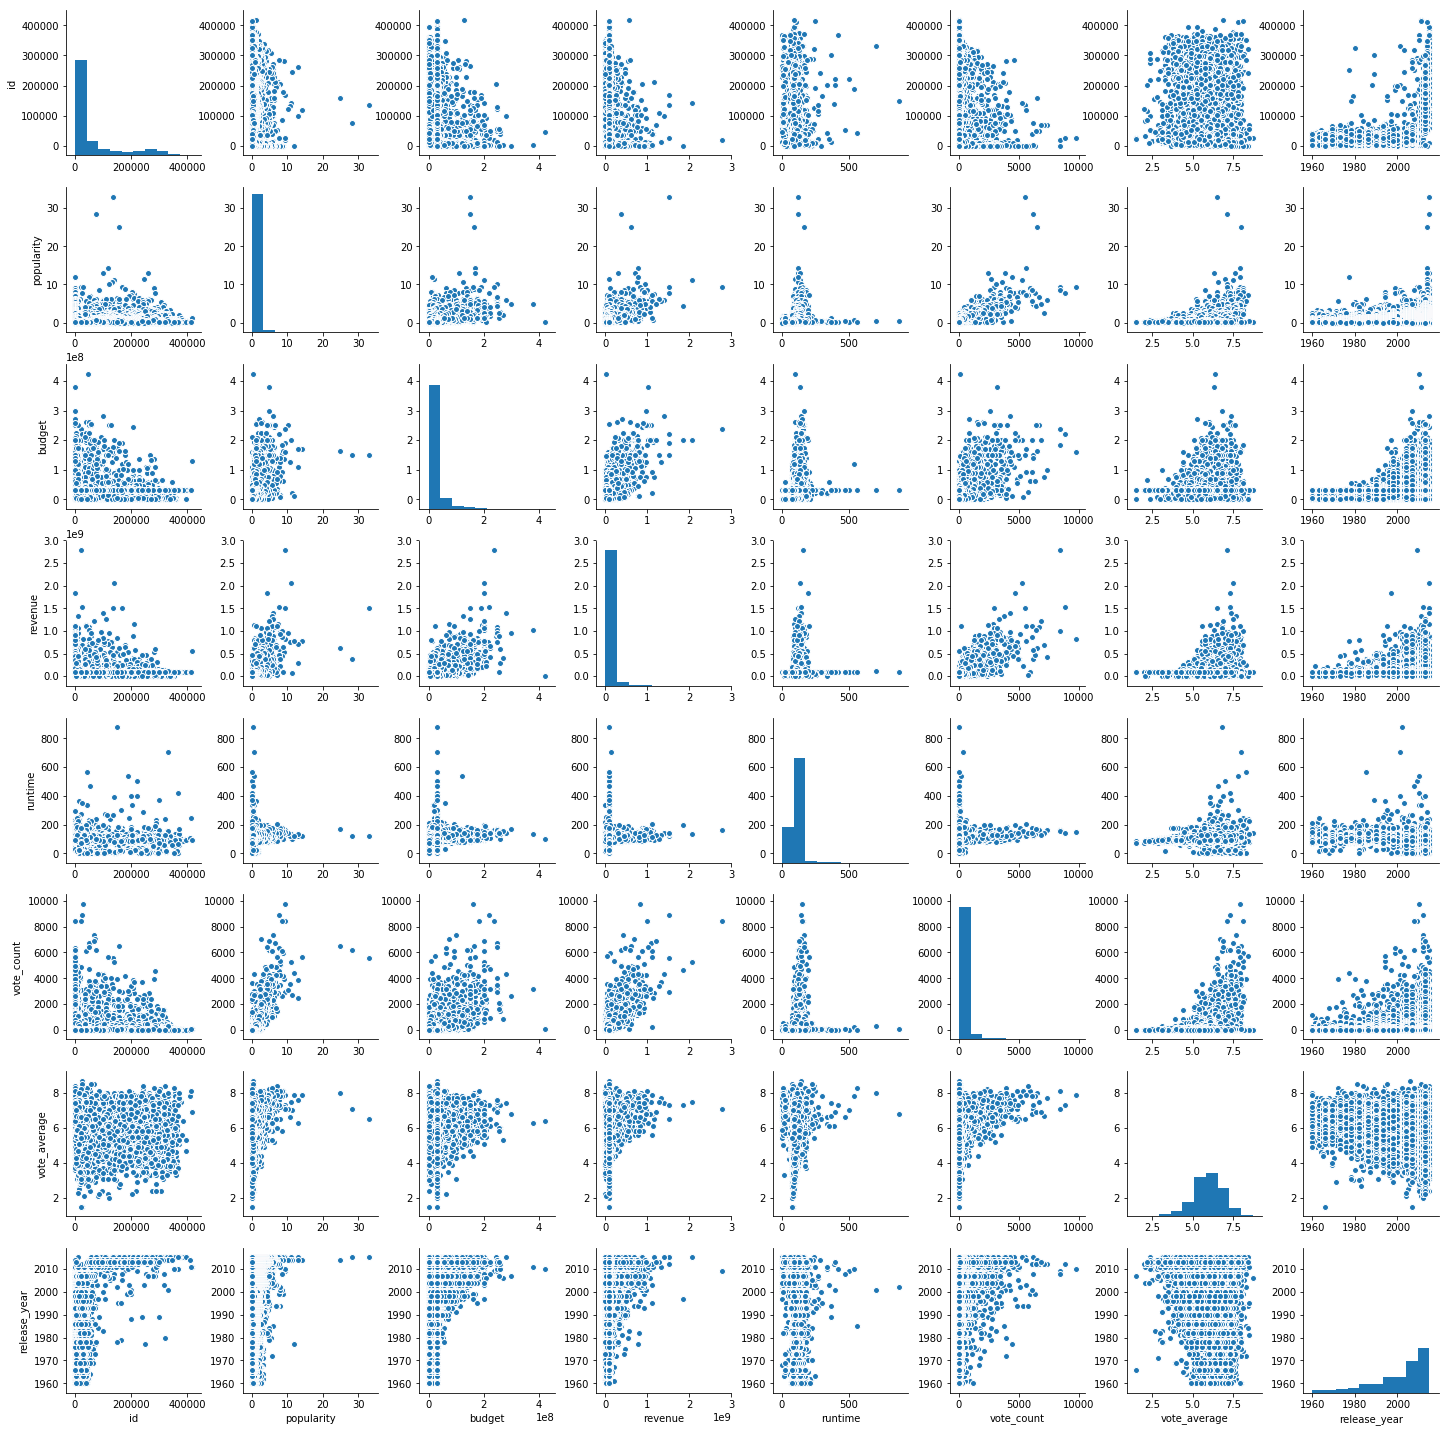

In [41]:
sns.pairplot(df)

## Q1: Does having a high budget for a movie correlate positivly with (revenue, popularity, or rate)?

### Function to plot correlation between variables

In [42]:
def varcorr (col_x, col_y):
    x = df[col_x]
    y = df[col_y]
    plt.title('Correlation between {} and {}'.format(col_x, col_y))
    plt.scatter(x, y)
    plt.xlabel(col_x)
    plt.ylabel(col_y)

### First lets see correlation between budget and revenue

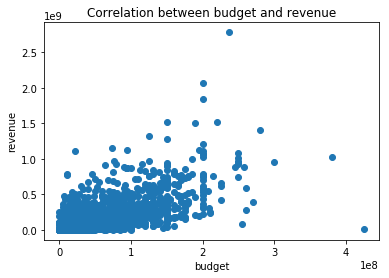

In [43]:
varcorr('budget', 'revenue')

### Then, lets see correlation between budget and popularity

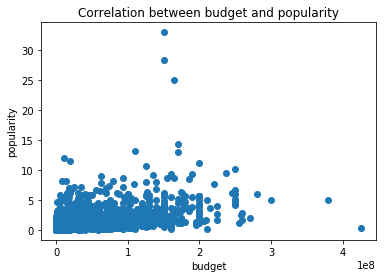

In [44]:
varcorr('budget', 'popularity')

### Then, lets see correlation between budget and vote_average

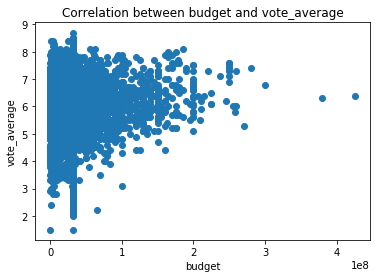

In [45]:
varcorr('budget', 'vote_average')

## Q2: Does movie stats change over years?

### Function to plot mean of movies stats over time

In [46]:
def statoveryears (y_column):

    average_mean_60s = df[(df['release_year'] >= 1960) & (df['release_year'] < 1970)][y_column].mean()
    average_mean_70s = df[(df['release_year'] >= 1970) & (df['release_year'] < 1980)][y_column].mean()
    average_mean_80s = df[(df['release_year'] >= 1980) & (df['release_year'] < 1990)][y_column].mean()
    average_mean_90s = df[(df['release_year'] >= 1990) & (df['release_year'] < 2000)][y_column].mean()
    average_mean_2000s = df[(df['release_year'] >= 2000) & (df['release_year'] < 2010)][y_column].mean()
    average_mean_2010s = df[(df['release_year'] >= 2010) & (df['release_year'] < 2020)][y_column].mean()
    
    #checking results
    list_of_vote_means = [average_mean_60s, average_mean_70s, average_mean_80s, average_mean_90s, average_mean_2000s, average_mean_2010s]
    
    x = np.arange(6)
    y = list_of_vote_means
    plt.bar(x, y)
    plt.title('movies {} over years'.format(y_column))
    plt.xticks(x, ['60s', '70s', '80s', '90s', '2000s', '2010s'])
    plt.xlabel('release_year')
    plt.ylabel(y_column)

### Check mean of movies rate over time

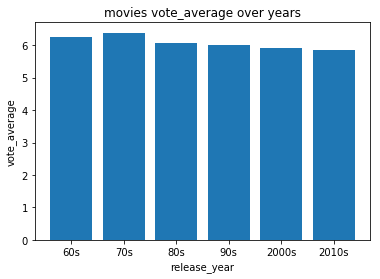

In [47]:
statoveryears('vote_average')

### Check mean of movies budget over time

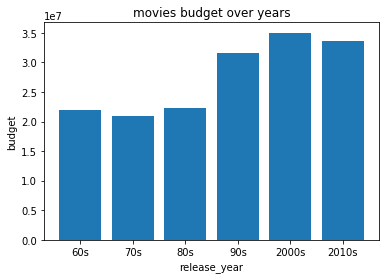

In [48]:
statoveryears('budget')

### Check mean of movies revenue over time

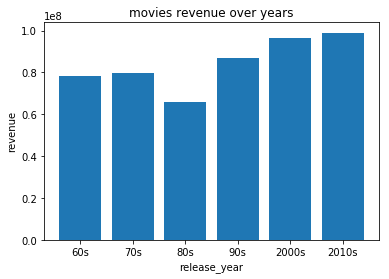

In [49]:
statoveryears('revenue')

### Check mean of movies popularity over time

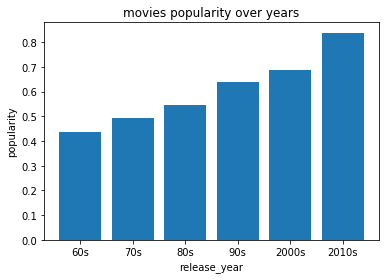

In [50]:
statoveryears('popularity')

### Check mean of movies runtime over time

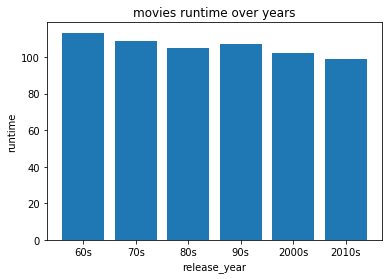

In [51]:
statoveryears('runtime')

<a id='conclusions'></a>
## Conclusion

### Findings:

#### 1: Budget of a movie doesn't have a noticable impact in revenue, popularity, or rate of that particular movie.

#### 2: Movies voting average decreased over the years.

#### 3: Movies budget average increased over years.

#### 4: Movies revenue average increased over years.

#### 5: Movies popularity average almost doubled over years. (more people are watching movies)

#### 6: Movies runtime average decreased over time.


### Limitations:

#### More than half of the dataset doesn't have the budget & revenue values, which are important for our analysis questions, and probably wil have a big effect in our analysis even after replacing them with the mean values in our cleaning phase.


### Cleaning method:

#### 1: Remove columns that are not needed for our analysis
#### 2: Drop null values from [cast, director, genre, production_companies]
#### 3: Fill the zeros (null values) of ['budget', 'revenue'] in our main dataframe with the mean values.
#### 4: Fill the zeros (null values) of runtime in our main dataframe with the mean values.
#### 5: Drop duplicate values.



In [52]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0